Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Loading Dataset

In [2]:
dataset = pd.read_csv("zomato.csv")

Understanding data 

In [3]:
dataset.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [4]:
dataset.shape

(51717, 17)

In [5]:
dataset.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Data Cleaning

Droping redundant columns


In [6]:
dataset.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list' ,'listed_in(city)'], axis=1, inplace=True)
dataset.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


Dropping Duplicates

In [8]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(35011, 10)

Cleaning Rate Column


In [9]:
dataset['rate'].unique


<bound method Series.unique of 0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 35011, dtype: object>

Removing 'NEW','-' and '/5' from rate column

In [10]:
def handle_rate(value):
    if value == 'NEW' or value=='-':
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
dataset['rate'] = dataset['rate'].apply(handle_rate)
dataset['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

Filling  null Values in rate column with Mean

In [11]:
dataset['rate'].isnull().sum()

np.int64(5097)

In [12]:
dataset['rate'].fillna(dataset['rate'].mean(), inplace = True)
dataset['rate'].isnull().sum()

np.int64(0)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35011 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35011 non-null  object 
 1   online_order                 35011 non-null  object 
 2   book_table                   35011 non-null  object 
 3   rate                         35011 non-null  float64
 4   votes                        35011 non-null  int64  
 5   location                     34997 non-null  object 
 6   rest_type                    34855 non-null  object 
 7   cuisines                     34978 non-null  object 
 8   approx_cost(for two people)  34790 non-null  object 
 9   listed_in(type)              35011 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ MB


Dropping NUll values from all columns

In [14]:
dataset.dropna(inplace=True)
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


Renaming columns for usability

In [15]:
dataset.rename(columns={'approx_cost(for two people)': 'cost2plates', 'listed_in(type)': 'type'},inplace = True)
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


Cleaning 'cost2plates' column

In [16]:
dataset['cost2plates'].unique

<bound method Series.unique of 0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: cost2plates, Length: 34636, dtype: object>

Removing ',' from 'cost2plate'

In [17]:
def handle_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)
    
dataset['cost2plates'] = dataset['cost2plates'].apply(handle_comma)
dataset['cost2plates'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost2plates, dtype: float64

cleaning 'rest_type' column

In [18]:
rest_types = dataset["rest_type"].value_counts()
rest_types 

rest_type
Quick Bites                   12123
Casual Dining                  7533
Cafe                           2578
Delivery                       1502
Dessert Parlor                 1491
                              ...  
Mess, Quick Bites                 1
Pop Up                            1
Bakery, Sweet Shop                1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Name: count, Length: 93, dtype: int64

In [19]:
rest_types_lessthan1000 = rest_types[rest_types < 1000]
rest_types_lessthan1000

rest_type
Casual Dining, Bar            949
Bakery                        736
Beverage Shop                 487
Bar                           473
Food Court                    424
                             ... 
Mess, Quick Bites               1
Pop Up                          1
Bakery, Sweet Shop              1
Quick Bites, Kiosk              1
Dessert Parlor, Food Court      1
Name: count, Length: 87, dtype: int64

Making rest_types less 1000 frequency as others

In [20]:
def handle_rest_type(value):
    if value in rest_types_lessthan1000:
        return 'others'
    else:
        return value
    
dataset['rest_type'] = dataset['rest_type'].apply(handle_rest_type)
dataset['rest_type'].value_counts()

rest_type
Quick Bites           12123
others                 8193
Casual Dining          7533
Cafe                   2578
Delivery               1502
Dessert Parlor         1491
Takeaway, Delivery     1216
Name: count, dtype: int64

Cleaning 'location' column

In [21]:
locations = dataset['location'].value_counts()
locations

location
BTM                     2484
Whitefield              1945
HSR                     1753
Indiranagar             1747
Marathahalli            1649
                        ... 
Central Bangalore          5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: count, Length: 93, dtype: int64

In [22]:
locations_lessthan300 = locations[locations<300]
locations_lessthan300

location
Cunningham Road                  287
Jeevan Bhima Nagar               258
Shanti Nagar                     258
St. Marks Road                   242
Vasanth Nagar                    180
Bommanahalli                     180
Basaveshwara Nagar               173
Thippasandra                     173
Shivajinagar                     167
Commercial Street                164
Ejipura                          157
Koramangala 8th Block            144
Kumaraswamy Layout               131
Koramangala 3rd Block            129
Wilson Garden                    128
Majestic                         119
Nagawara                         117
Seshadripuram                    115
Hennur                           106
ITPL Main Road, Whitefield       102
HBR Layout                       100
Varthur Main Road, Whitefield     99
Yeshwantpur                       95
Race Course Road                  94
Infantry Road                     84
City Market                       83
Kaggadasapura                

Making loactions less 300 frequency as others

In [23]:
def handle_location(value):
    if value in locations_lessthan300:
        return 'others'
    else:
        return value
dataset['location'] = dataset['location'].apply(handle_location)
dataset['location'].value_counts()

location
others                   4838
BTM                      2484
Whitefield               1945
HSR                      1753
Indiranagar              1747
Marathahalli             1649
Koramangala 5th Block    1605
JP Nagar                 1400
Jayanagar                1242
Electronic City          1212
Bellandur                1120
Bannerghatta Road        1052
Sarjapur Road             933
Brigade Road              687
Koramangala 7th Block     624
Brookefield               598
Koramangala 6th Block     590
Koramangala 4th Block     587
Kalyan Nagar              584
New BEL Road              582
Banashankari              571
Malleshwaram              556
MG Road                   554
Ulsoor                    546
Koramangala 1st Block     539
Frazer Town               469
Basavanagudi              463
Rajajinagar               462
Church Street             446
Banaswadi                 427
Residency Road            423
Kammanahalli              417
Old Airport Road          401
L

Cleaning 'cuisines' column

In [24]:
cuisines = dataset['cuisines'].value_counts()
cuisines

cuisines
North Indian                               1895
North Indian, Chinese                      1561
South Indian                               1172
Bakery, Desserts                            591
Biryani                                     557
                                           ... 
American, Thai, Healthy Food                  1
Andhra, Hyderabadi, Chinese                   1
Mughlai, Biryani, Chinese, North Indian       1
French                                        1
North Indian, Chinese, Kebab, Biryani         1
Name: count, Length: 2704, dtype: int64

In [25]:
cuisines_lessthan100 = cuisines[cuisines<100]
cuisines_lessthan100

cuisines
Cafe, Desserts                             99
Fast Food, Burger                          97
North Indian, Street Food                  96
North Indian, Continental                  95
Chinese, Thai, Momos                       82
                                           ..
American, Thai, Healthy Food                1
Andhra, Hyderabadi, Chinese                 1
Mughlai, Biryani, Chinese, North Indian     1
French                                      1
North Indian, Chinese, Kebab, Biryani       1
Name: count, Length: 2651, dtype: int64

In [26]:
def handle_cuisines(value):
    if value in cuisines_lessthan100:
        return "others"
    else:
        return value
    
dataset['cuisines'] = dataset['cuisines'].apply(handle_cuisines)
dataset['cuisines'].value_counts()

cuisines
others                                              19621
North Indian                                         1895
North Indian, Chinese                                1561
South Indian                                         1172
Bakery, Desserts                                      591
Biryani                                               557
Fast Food                                             485
South Indian, North Indian, Chinese                   475
Desserts                                              447
Cafe                                                  447
Bakery                                                385
Chinese                                               337
Ice Cream, Desserts                                   304
Mithai, Street Food                                   256
Chinese, North Indian                                 249
North Indian, Chinese, Biryani                        234
Desserts, Ice Cream                                   226
North

# Data Visualization

Count Plot of Various Locations

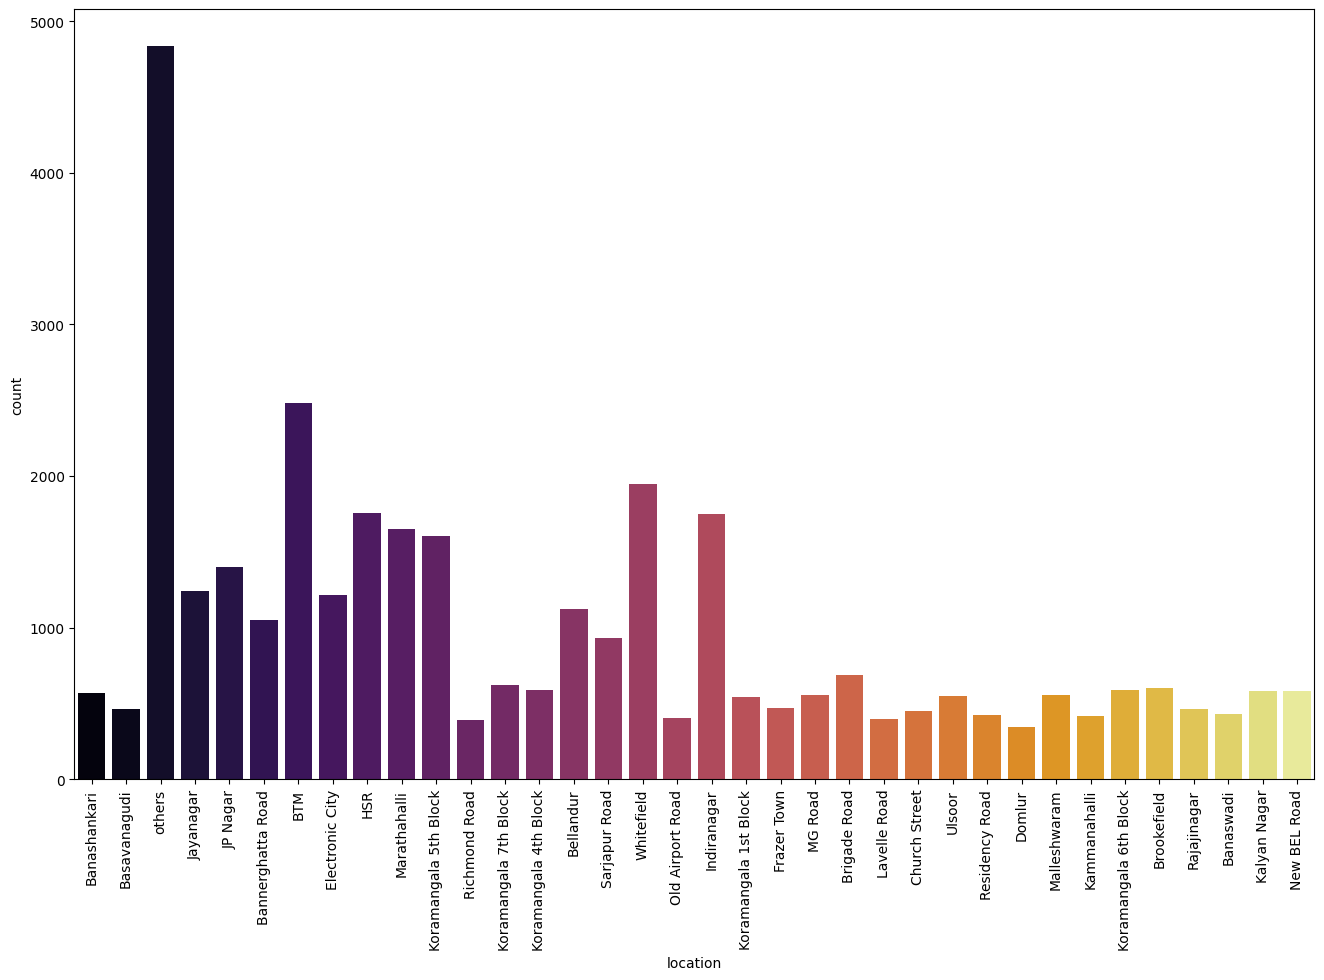

In [27]:
plt.figure(figsize=(16,10))
sns.countplot(x = 'location', data=dataset, palette = 'inferno')
plt.xticks(rotation=90)
plt.show()

Visualizing Restaurant having Online orders facility


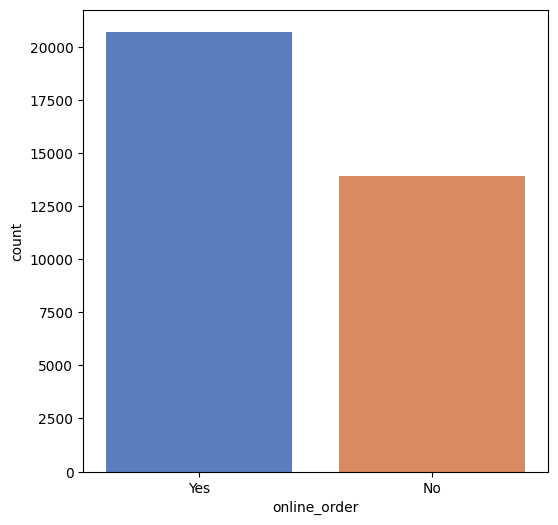

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'online_order', data=dataset,palette= 'muted')
plt.show()

Visualizing Restaurant having Book Table facility

<Axes: xlabel='book_table', ylabel='count'>

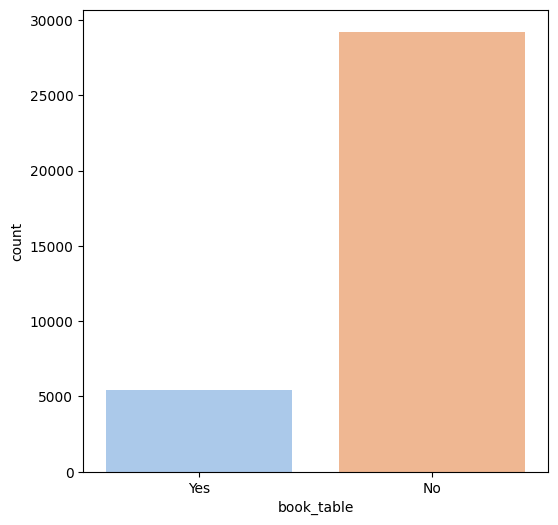

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'book_table', data=dataset, palette= 'pastel')

Visualizing Online Order vs Rating

<Axes: xlabel='online_order', ylabel='rate'>

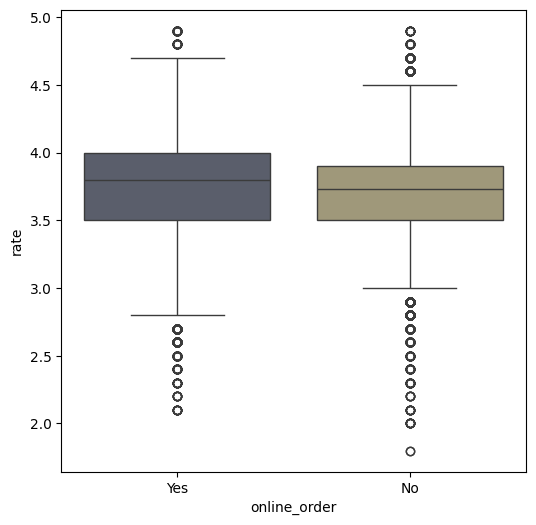

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=dataset, palette='cividis')

Visualizing Book Table vs Rating

<Axes: xlabel='book_table', ylabel='rate'>

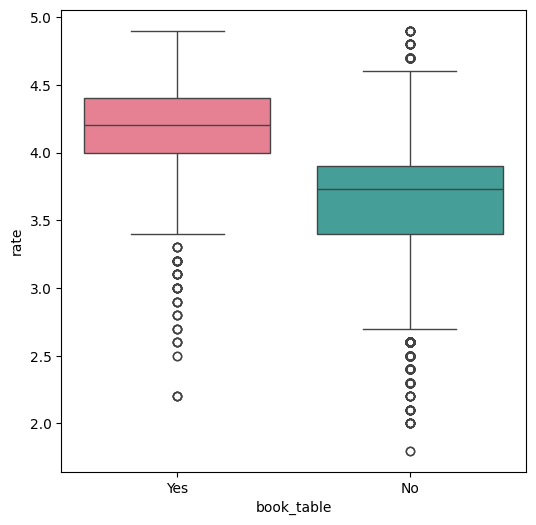

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate', data=dataset, palette="husl")


Visualizing Online Order facility location wise

In [ ]:
data1 = dataset.groupby(['location', 'online_order']) ['name'].count()
data1.to_csv('location_online.csv')
data1 = pd.read_csv('location_online.csv')
data1 = pd.pivot_table(data1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
data1

name      
online_order             No   Yes
location                         
BTM                     802  1682
Banashankari            260   311
Banaswadi               208   219
Bannerghatta Road       399   653
Basavanagudi            182   281
Bellandur               437   683
Brigade Road            293   394
Brookefield             206   392
Church Street           182   264
Domlur                  187   158
Electronic City         657   555
Frazer Town             206   263
HSR                     438  1315
Indiranagar             647  1100
JP Nagar                562   838
Jayanagar               380   862
Kalyan Nagar            240   344
Kammanahalli            176   241
Koramangala 1st Block   148   391
Koramangala 4th Block   279   308
Koramangala 5th Block   580  1025
Koramangala 6th Block   211   379
Koramangala 7th Block   190   434
Lavelle Road            237   159
MG Road                 297   257
Malleshwaram            224   332
Marathahalli            628  1021
New BEL Road            250   332
Old Airport Road        201   200
Rajajinagar             214   248
Residency Road          276   147
Richmond Road           249   140
Sarjapur Road           282   651
Ulsoor                  201   345
Whitefield              880  1065
others                 2106  2732

<Axes: xlabel='location'>

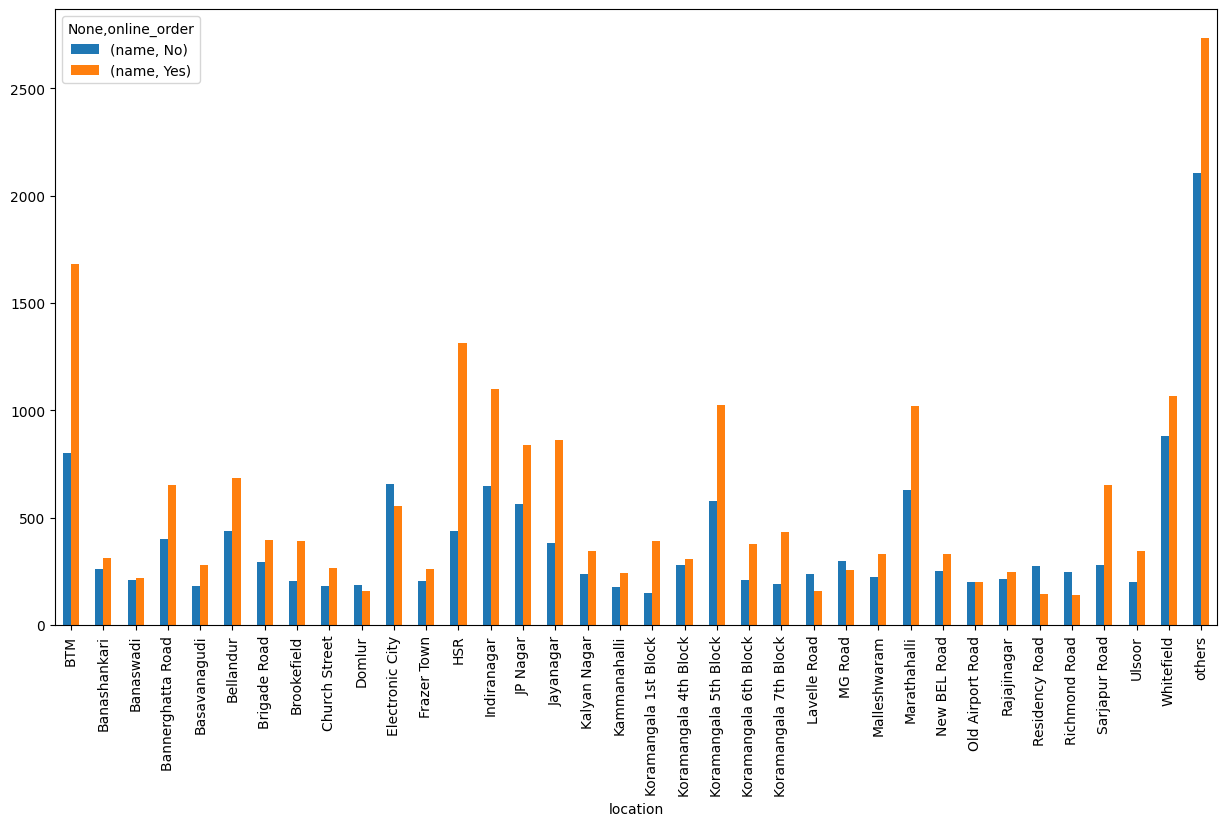

In [ ]:
data1.plot(kind='bar', figsize=(15,8))


Visualizing Book Table facility location wise

In [ ]:
data2 = dataset.groupby(['location','book_table'])['name'].count()
data2.to_csv("location_table.csv")
data2 = pd.read_csv('location_table.csv')
data2 = pd.pivot_table(data2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)

<function matplotlib.pyplot.show(close=None, block=None)>

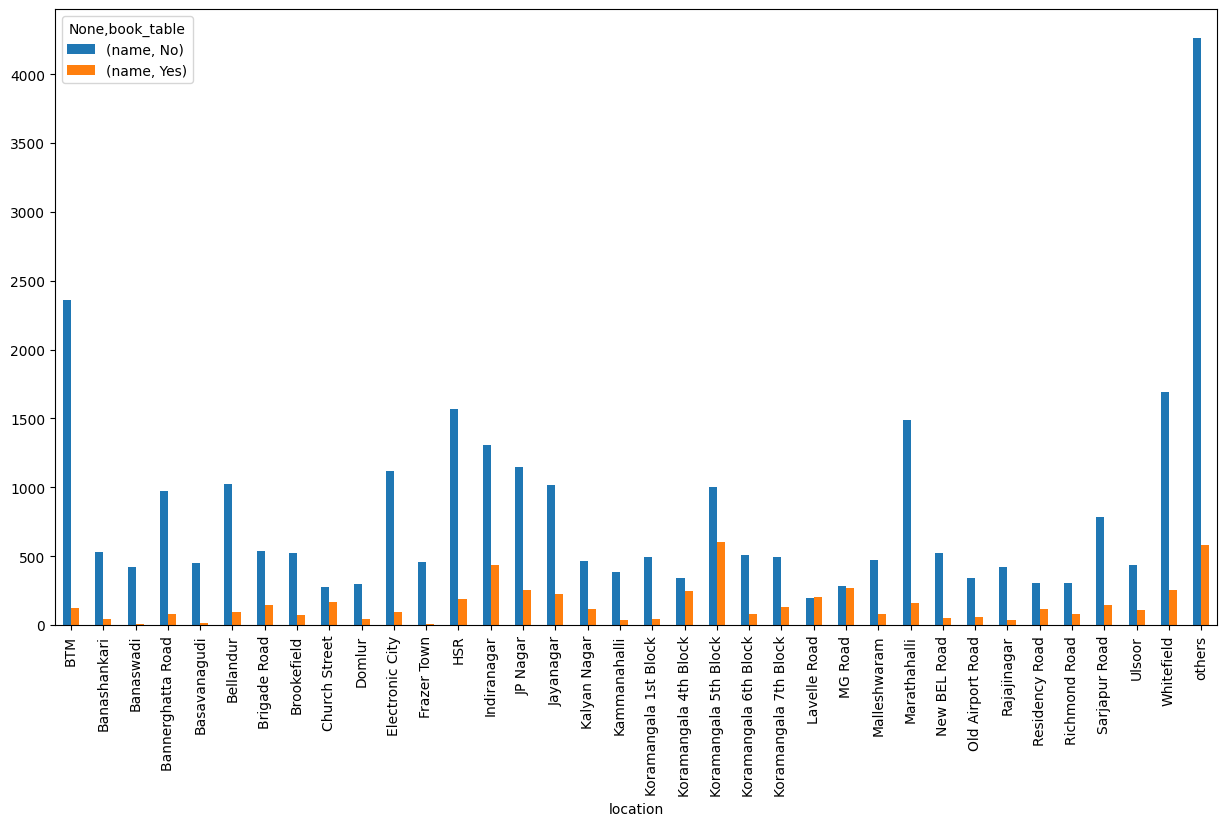

In [ ]:
data2.plot(kind="bar", figsize=(15,8))
plt.show

Visualizing Types of Restaurant vs Rating

<Axes: xlabel='type', ylabel='rate'>

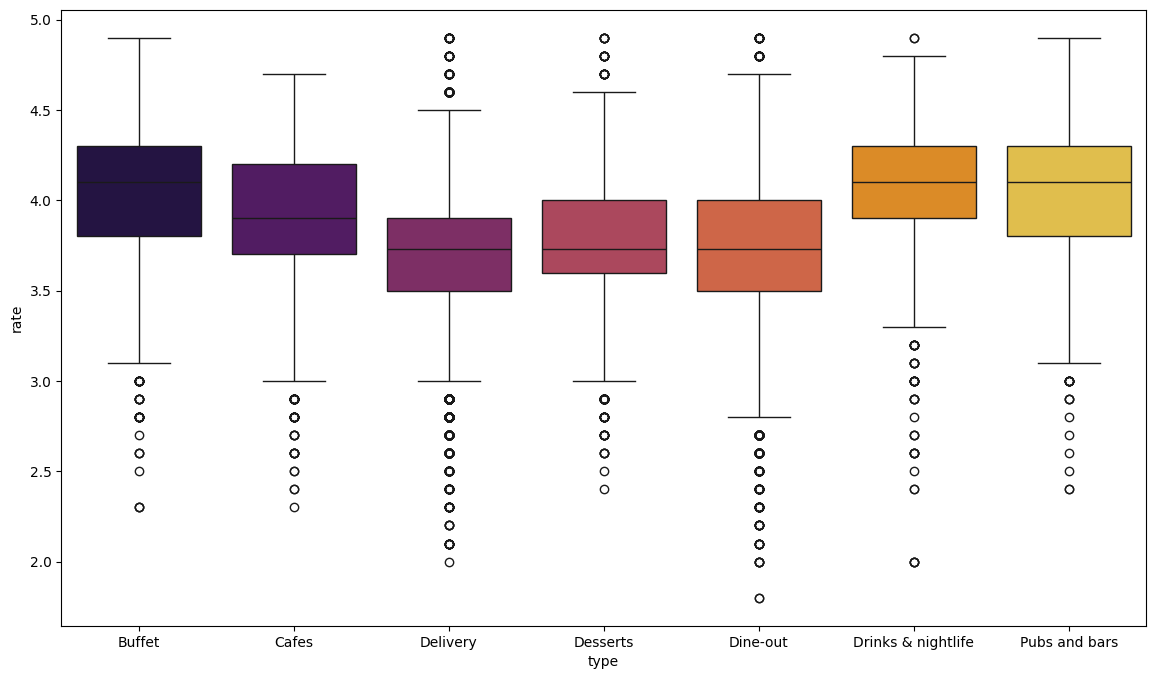

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x='type', y='rate', data=dataset, palette='inferno')

Grouping type of Restaurant location wise

In [ ]:
data3 = dataset.groupby(['location', 'type'])['name'].count()
data3.to_csv('location_type.csv')
data3 = pd.read_csv('location_type.csv')
data3 = pd.pivot_table(data3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)
data3


name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       15    46     1418      110      866   
Banashankari               5    24      243       46      246   
Banaswadi                  0    13      157       19      233   
Bannerghatta Road          8    27      510       92      404   
Basavanagudi               4     8      195       45      208   
Bellandur                 28    34      513       70      442   
Brigade Road              13    24      249       55      273   
Brookefield                6    17      299       42      230   
Church Street             19    44      138       21      172   
Domlur                    11    12      168       24      108   
Electronic City           22    24      548       71      505   
Frazer Town                1    10      267       46      141   
HSR                       14    42     1076      108      484   
Indiranagar               38    97      830      136      515   
JP Nagar                  25    41      629      104      554   
Jayanagar                 19    50      560      118      483   
Kalyan Nagar               9    24      188       45      303   
Kammanahalli               2    14      160       18      220   
Koramangala 1st Block      3    14      319       32      156   
Koramangala 4th Block     13    43      249       38      163   
Koramangala 5th Block     51   118      626      135      542   
Koramangala 6th Block     12    30      277       48      180   
Koramangala 7th Block     19    30      247       69      215   
Lavelle Road              24    22       87       28      158   
MG Road                   32    55      138       37      221   
Malleshwaram              11    24      197       63      231   
Marathahalli              34    30      874       94      594   
New BEL Road               4    29      277       33      223   
Old Airport Road          12     5      174       34      155   
Rajajinagar                9     4      196       44      196   
Residency Road            14    19      106       38      186   
Richmond Road             41    13      110       37      172   
Sarjapur Road             23    19      473       78      299   
Ulsoor                    12    32      217       38      216   
Whitefield                28    50      934      128      726   
others                    88   150     2346      308     1763   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   15            14  
Banashankari                           7             0  
Banaswadi                              4             1  
Bannerghatta Road                      9             2  
Basavanagudi                           3             0  
Bellandur                             17            16  
Brigade Road                          51            22  
Brookefield                            4             0  
Church Street                         31            21  
Domlur                                11            11  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            15  
Indiranagar                           65            66  
JP Nagar                              40             7  
Jayanagar                             12             0  
Kalyan Nagar                          15             0  
Kammanahalli                           3             0  
Koramangala 1st Block                  5            10  
Koramangala 4th Block                 50            31  
Koramangala 5th Block                 75            58  
Koramangala 6th Block                 25            18  
Koramangala 7th Block                 22            22  
Lavell

<Axes: xlabel='location'>

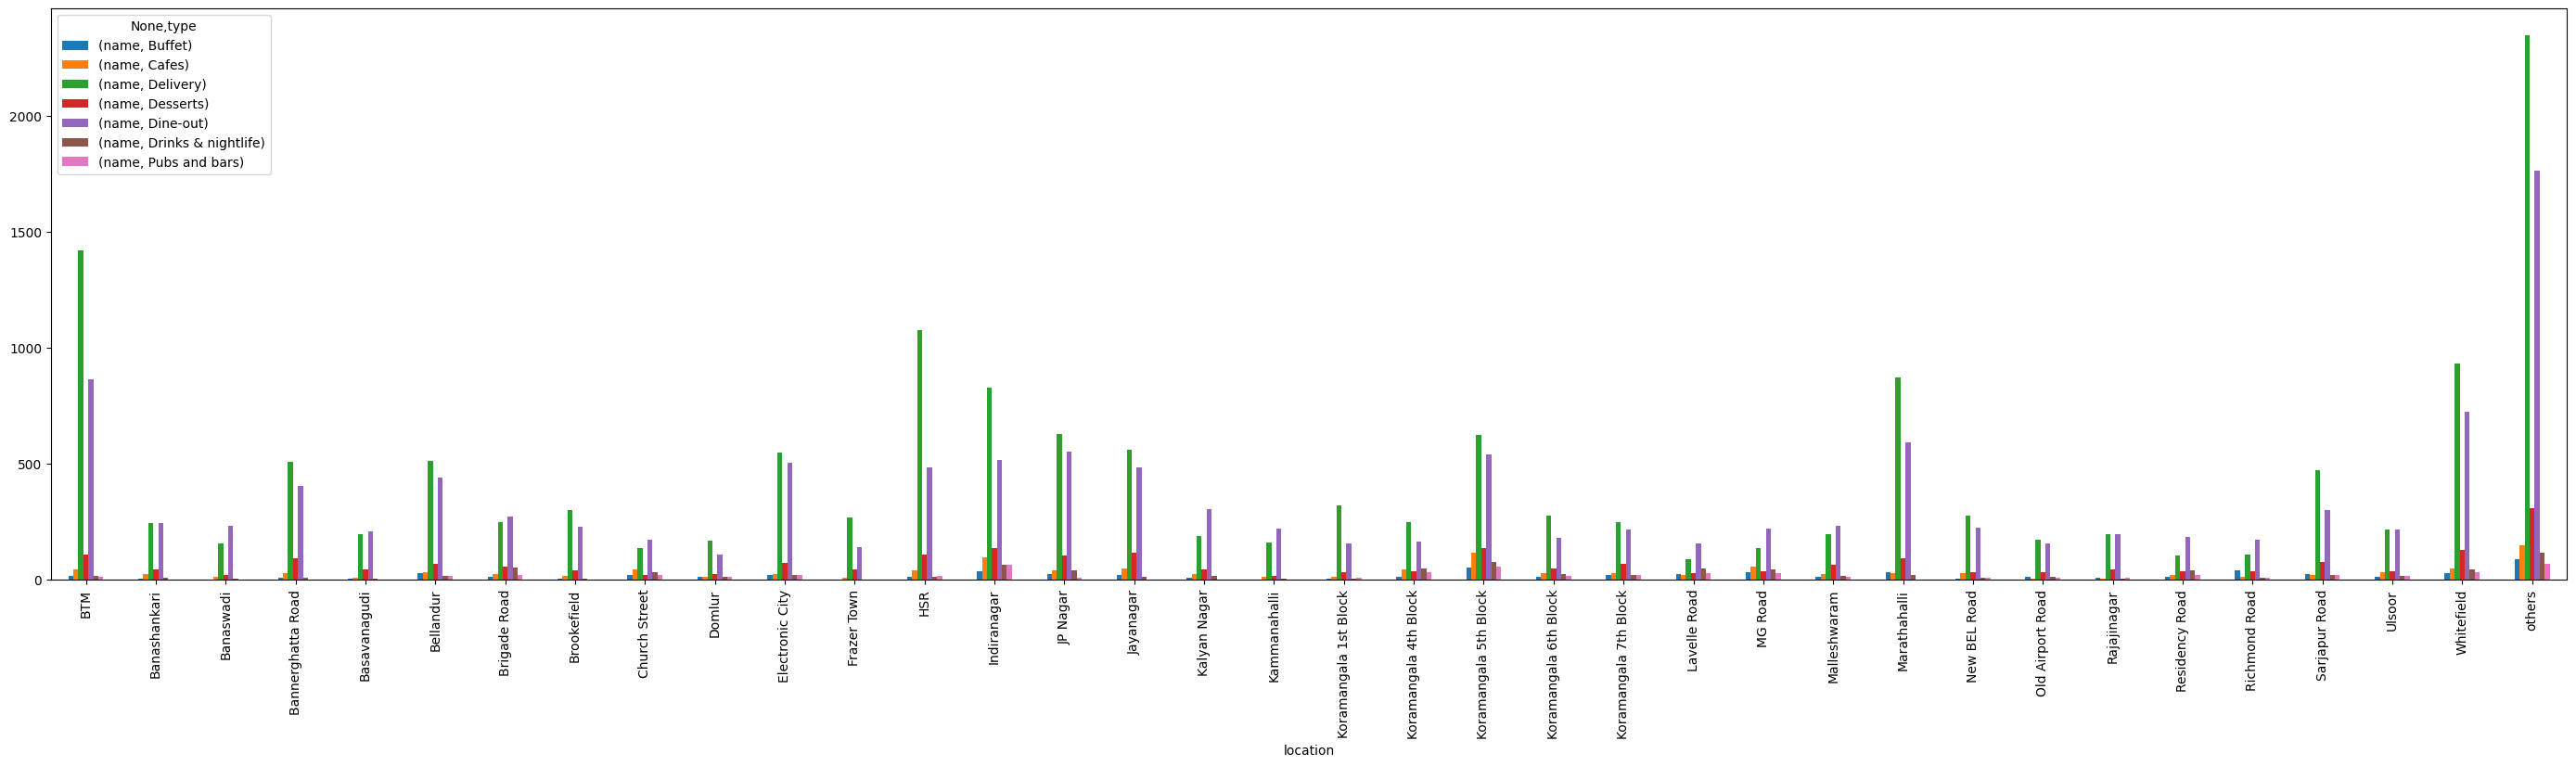

In [ ]:
data3.plot(kind="bar", figsize=(35,8))

Number of Votes location wise

In [ ]:
data4 = dataset[['location','votes']]
data4.drop_duplicates()
data5 = dataset.groupby(['location'])['votes'].sum()
data5 = data5.to_frame()
data5 = data5.sort_values('votes', ascending= False)
data5.head()

,votes
location,
Koramangala 5th Block,1984132
Indiranagar,1129994
others,1016001
Koramangala 4th Block,591240
Church Street,555228


<function matplotlib.pyplot.show(close=None, block=None)>

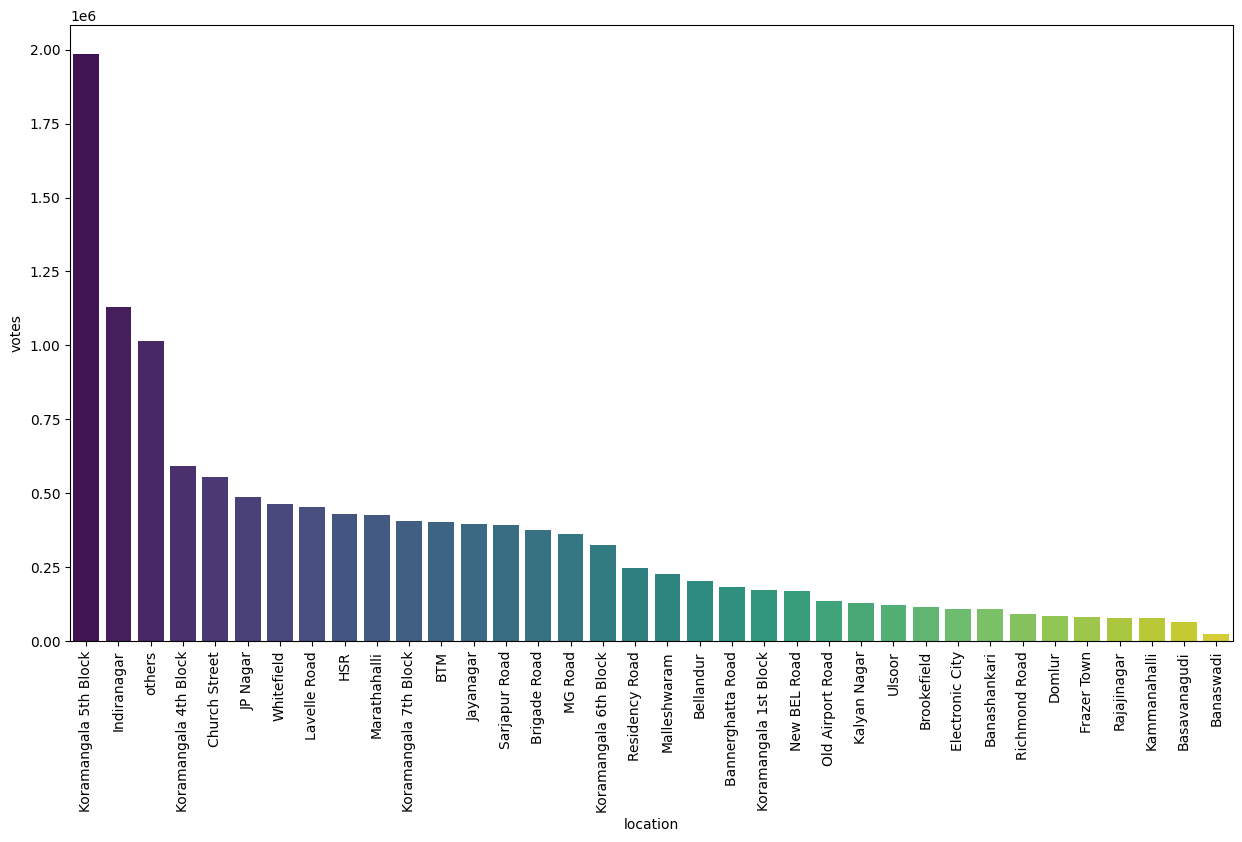

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=data5.index, y=data5['votes'],palette='viridis')
plt.xticks(rotation= 90)
plt.show


Visualizing Top Cuisines

In [ ]:
data6 = dataset[['cuisines', 'votes']]
data6.drop_duplicates()
data7 = data6.groupby(['cuisines'])['votes'].sum()
data7 = data7.to_frame()
data7 = data7.sort_values('votes', ascending=False)
data7.head()


,votes
cuisines,
others,10498501
North Indian,439263
"North Indian, Chinese",187867
South Indian,130350
"North Indian, Mughlai",88971


In [ ]:
data7 = data7.iloc[1:,:]
data7.head()


,votes
cuisines,
North Indian,439263
"North Indian, Chinese",187867
South Indian,130350
"North Indian, Mughlai",88971
Chinese,79450


<function matplotlib.pyplot.show(close=None, block=None)>

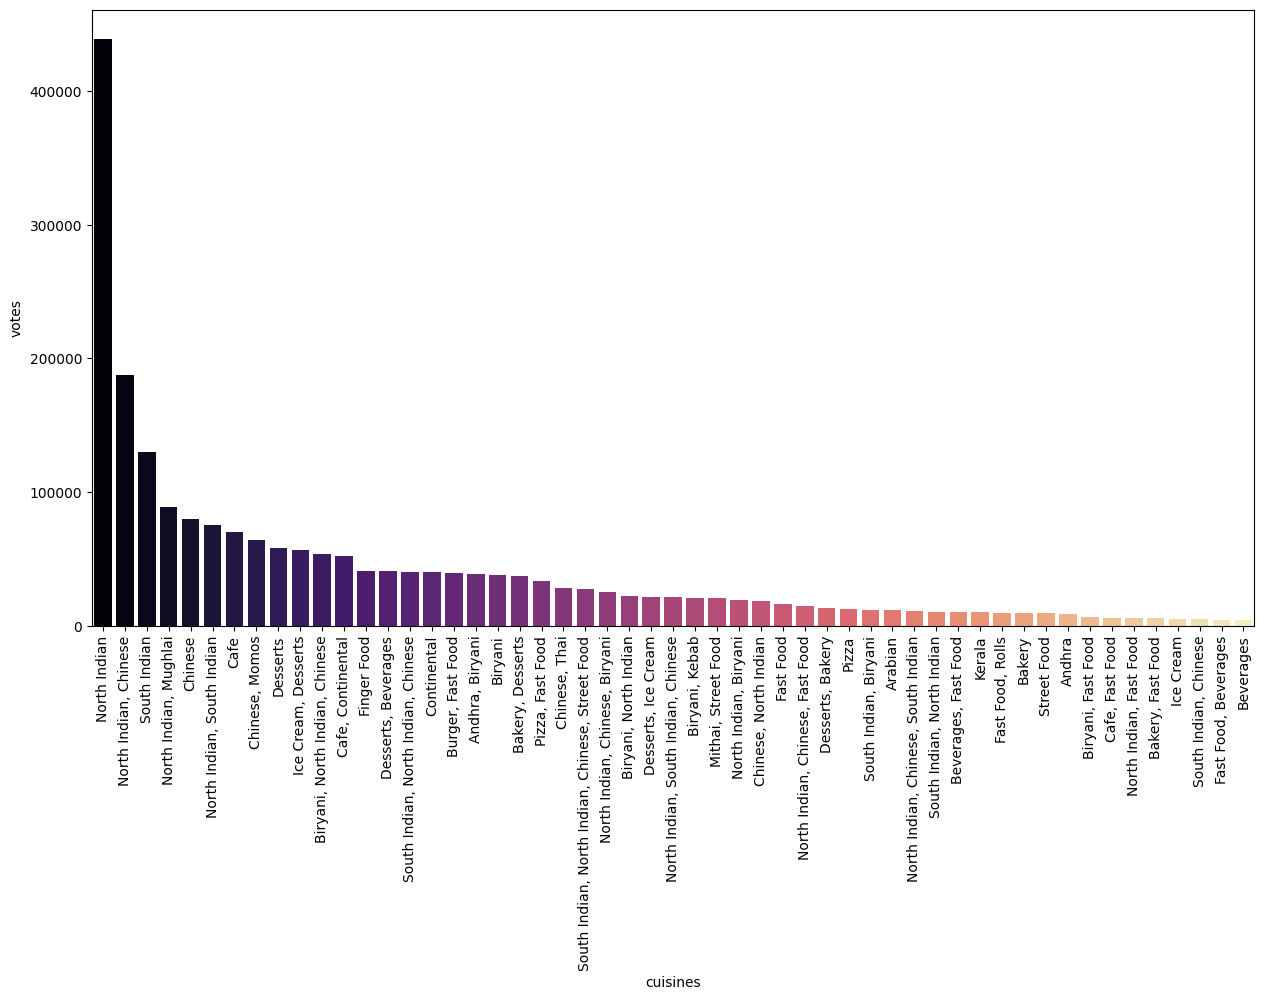

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=data7.index, y=data7['votes'],palette='magma')
plt.xticks(rotation=90)
plt.show


Top 10 Cities

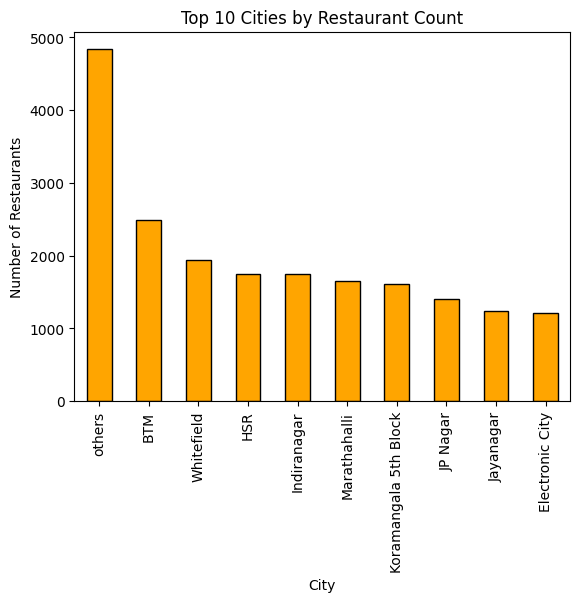

In [ ]:
dataset['location'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()


Top 10 Cuisines

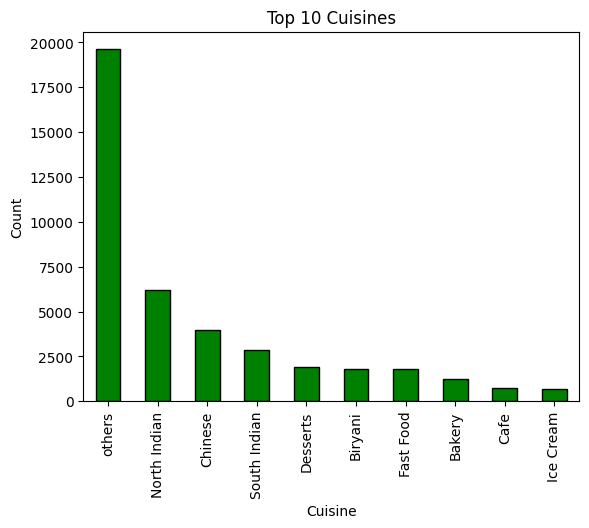

In [ ]:
dataset['cuisines'].dropna().str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar', color='green', edgecolor='black')
plt.title("Top 10 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.show()